<a href="https://colab.research.google.com/github/amanullahshah32/Deep-Learning/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libraries in PyTorch

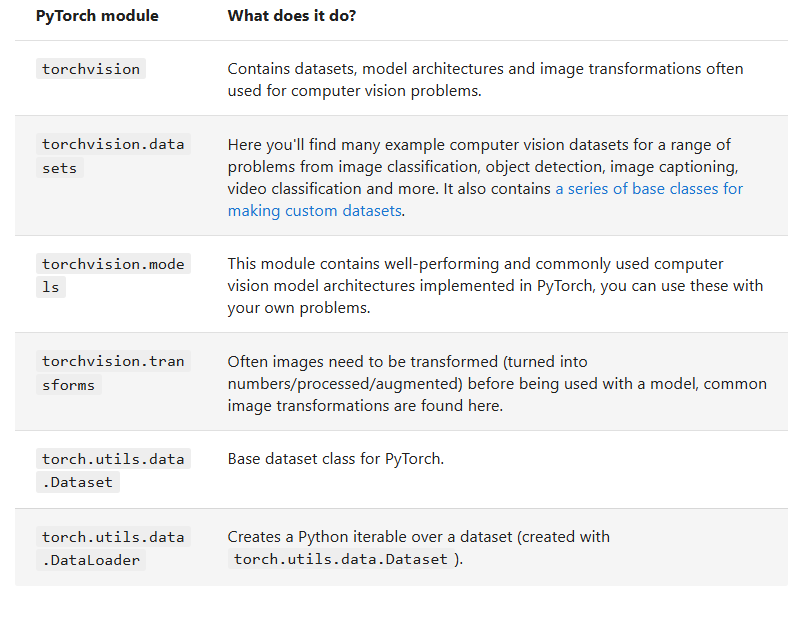

In [2]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from  torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib as plt

# check versions:
print(f"PyTorch verison: {torch.__version__}")
print(f"TorchVision version: {torchvision.__version__}")

PyTorch verison: 2.3.1+cu121
TorchVision version: 0.18.1+cu121


## 1. Getting a dataset


In [4]:
# Setup training data
train_data = datasets.FashionMNIST(root='data', # where to download
                                   train = True, # get training data
                                   download= True, # donwload data if it doesn't exist on disk
                                   transform = ToTensor(), # images come as PIL format, we want to turn it into tensors
                                   target_transform = None # You can transform labels as well
                                   )

# Setup testing data
test_data = datasets.FashionMNIST(
    root='data',
    train=False, # get the test data
    download= True,
    transform = ToTensor()
)

In [5]:
# see first training sample

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and output shapes of a computer vision model

We've got a big tensor of values (the image) leading to a single value for the target (the label).



In [6]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [7]:
torch.cuda.is_available()

False

The order of our current tensor is often referred to as CHW (Color Channels, Height, Width).

There's debate on whether images should be represented as CHW (color channels first) or HWC (color channels last).

Note: You'll also see NCHW and NHWC formats where N stands for number of images. For example if you have a batch_size=32, your tensor shape may be [32, 1, 28, 28]. We'll cover batch sizes later.

In [9]:
# how many samples are there
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)